In [72]:
!pip install sklearn
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
import pandas as pd
import numpy as np
import math
from itertools import chain
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.api as sm
from itertools import combinations
import seaborn as sns
import scipy.stats as stats
from scipy.stats import t
import sklearn as skl
from sklearn.cluster import KMeans


$$EXERCISE \;\;\; 1$$

In [74]:
earnings = pd.read_csv('earnings.csv',sep= ';')##Reading the dataset from the earnings.csv file
earnings,len(earnings) 


(           id       base    bonus  overtime_pay    other  sector  section_07  \
 0      192064   26651.53     0.00          0.00     0.00       1           3   
 1       25495   40168.50  1500.00          0.00  3414.32       1           2   
 2      142164   20134.80     0.00          0.00  1700.41       1           2   
 3      198034   16475.00     0.00          0.00  1305.00       1           2   
 4      144990   34797.60     0.00       1893.35  3118.73       1           2   
 ...       ...        ...      ...           ...      ...     ...         ...   
 10995   41597   36573.22  1323.65       1276.80  3337.32       1           2   
 10996  120022   28280.00  5470.00          0.00  2385.13       1           1   
 10997   41800  109316.96     0.00          0.00  9042.58       1           1   
 10998  153849   57721.35  6950.00          0.00  4906.32       1           1   
 10999     724   37676.52   700.00        730.31  3296.65       1           2   
 
        sex  education  co

The length of the data is of 11000 rows with 15 columns, a total of 165000 observations, it is a very large dataset.

We have six qualitative variables and nine quantitative variables:

**Quantitative variables**:base, bonus, overtime pay, other,age,duration_total, duration_entity, suration_nominal,duration_overtime.

**Qualitative variables**: id, sector,section_07, sex,education,contract

In [76]:
t = earnings.isnull()
earnings.isna().sum()

(id                   0
 base                 0
 bonus                0
 overtime_pay         0
 other                0
 sector               0
 section_07           0
 sex                  0
 education            0
 contract             0
 age                  0
 duration_total       0
 duration_entity      0
 duration_nominal     0
 duration_overtime    0
 dtype: int64, 0)

Checking for NaN values, we find nothing. Therefore there are no null observations

In [78]:
##For all the qualitative data we are going to construct frequency tables, whereas for the quantitative data we will find some statistics
for i in range(5,10):
  print(earnings.iloc[:,i].value_counts())


1    10548
2      452
Name: sector, dtype: int64
2    5867
3    2732
1    2401
Name: section_07, dtype: int64
2    8289
1    2711
Name: sex, dtype: int64
2    6633
4    1983
5     906
3     680
1     430
6     368
Name: education, dtype: int64
1    9306
2    1694
Name: contract, dtype: int64


For the qualitative variables a frequency tables is used to see which values is more present in each of the columns

In [79]:
##Computation of the median and variance of the quantitative variables
for j in range(1,4),range(10,14):
    print('\n\nMean values for quantitative variables')
    print(earnings.iloc[:,j].mean())
    print('\n\nVariance values for qualitative values')
    print(earnings.iloc[:,j].var())
    print('\n\nMedian values for qualitative values')
    print(earnings.iloc[:,j].median())





Mean values for quantitative variables
base            33376.738065
bonus            2128.486176
overtime_pay     1679.273923
dtype: float64


Variance values for qualitative values
base            3.715854e+08
bonus           2.466557e+07
overtime_pay    2.924608e+07
dtype: float64


Median values for qualitative values
base            31341.245
bonus             620.000
overtime_pay        0.000
dtype: float64


Mean values for quantitative variables
age                   42.470182
duration_total        18.567080
duration_entity       11.401382
duration_nominal    1301.307435
dtype: float64


Variance values for qualitative values
age                    100.242951
duration_total         120.932908
duration_entity         86.903056
duration_nominal    291804.408302
dtype: float64


Median values for qualitative values
age                   43.000
duration_total        19.035
duration_entity        9.100
duration_nominal    1591.900
dtype: float64


For the quantitative variables we use basic statistics like mean, variance and median to represent how the data behaves.

We compute the first four columns first: base , bonus , overtime_pay and other.

After we compute the five last ones related to the duration of the employment: age, duration_total, duration_entity, duration_nominal, duration_overtime

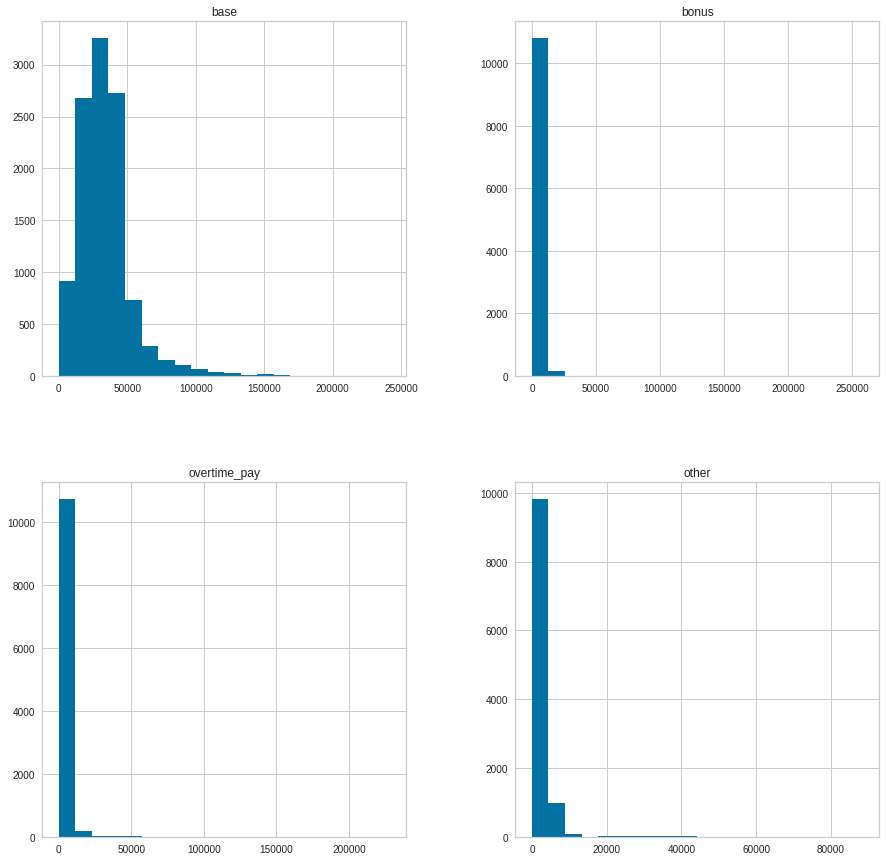

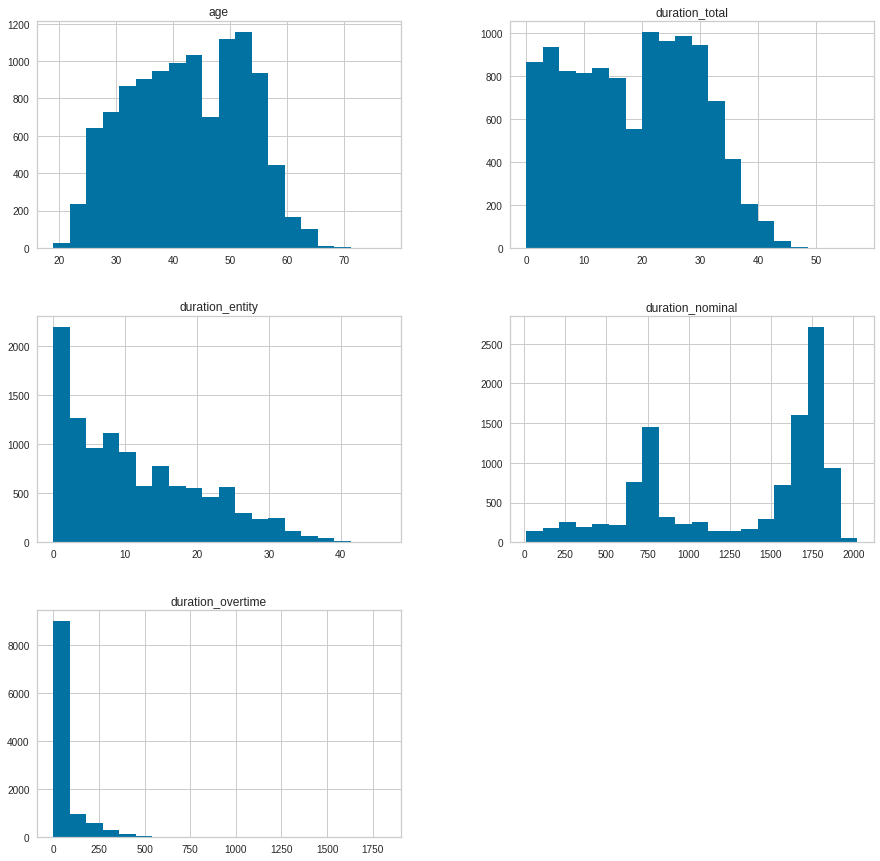

In [80]:
for i in range(1,5),range(10,15): ##plot the histograms for all the quantitative variables in the earnings dataset  
  earnings.hist(column=earnings.columns[i],bins=20, figsize = (15,15))

One of the ways to look for normality is to plot all the variables with histogram. We look for bell shaped functions troughout all the quantitative variables.

The age variable follows a similar pattern, so we will see how it behaves in the qqplot to ensure this hypothesis, because it could come from other distributions like t-student or chi-square distribution.



It is also noticeable that **duration entity** and **base** variables could follow an exponential distribution with the values lowering in a curved shape.

  The shape of the **duration_nominal** is similar to a bimodal distribution with two marked peaks, however not equally shaped.




Other variables are distributed very unevenly like **overtime_pay**,**bonus** or **duration_overtime**, with values close to 0 that take most of the observations





> 



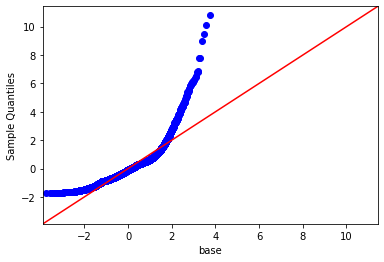

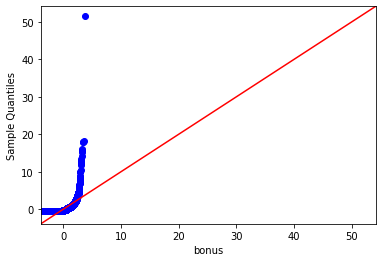

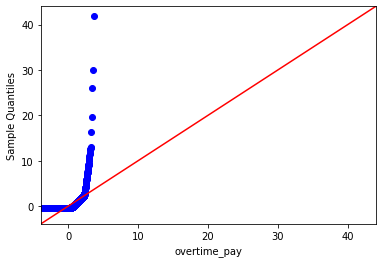

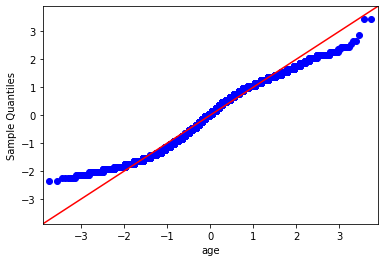

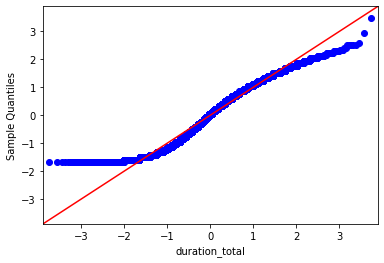

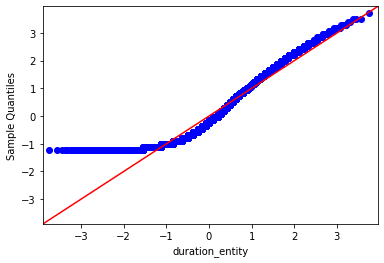

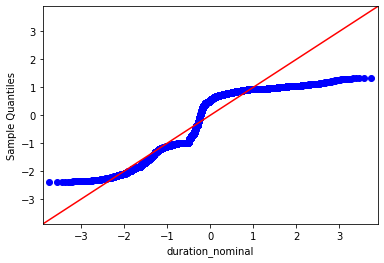

In [47]:
for i in list(range(1,4))+list(range(10,14)): ##Standarize the variables to input them in the qqplot and compare to the normal distribution
  standar = stats.zscore( earnings.iloc[:,i]) 
  sm.qqplot(standar,line = '45',xlabel=earnings.columns[i])

No qqplot seems to follow the 45 degrees line for the normal distribution, also the **age** values differ from the line only on the sides. Which means that the kurtosis is not the ideal but the variable is still unimodal and bell shaped.
Moreover **base** salary values look like an exponential distributed sample in this particular plot

$$EXERCISE \;\;\; 2$$

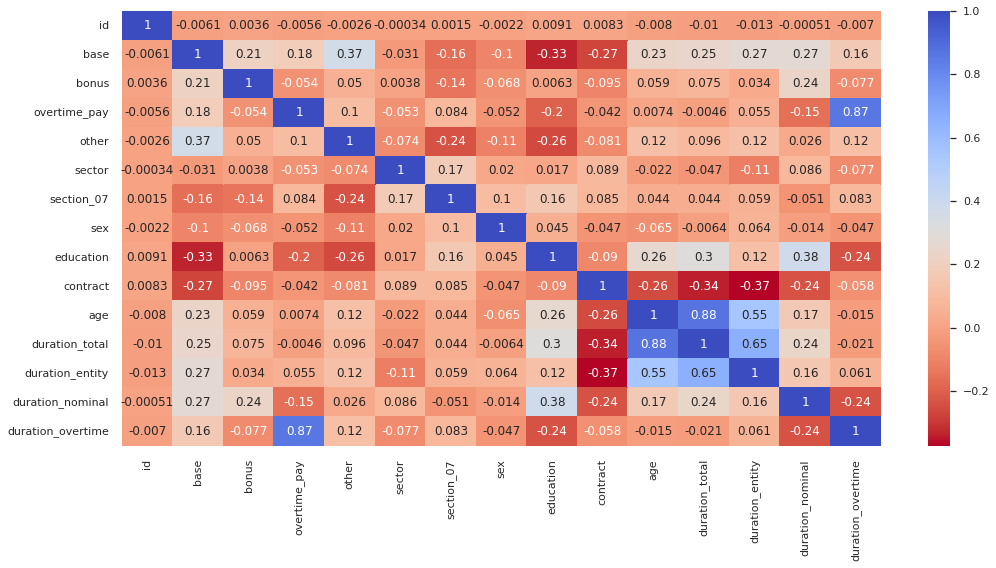

In [81]:
sns.set(rc={'figure.figsize':(17,8)}) ##Setting the size of the matrix
sns.heatmap(earnings.corr(),annot=True,cmap='coolwarm_r') ##Using the seaborn library  to compute the PEARSON correlation coef.

This correlation matrix is computed with the Pearson coefficient. Knowing that in correlation coefficients, if the coefficient is positive both variables tend to grow and if the coefficient is negative; while one variable grows the other wanes.


In this matrix the diagonal is naturally full of 1's. Apart from that, we can observe high coefficients in correlation between variables that seem rather obvious like: 
**duration_overtime** vs **overtime pay** ; **age** vs **duration_total** and **duration_total** vs **duration_entity**. The more people work overtime the higher overtime salary you have, also the older the bigger time people have spend working. Both this coefficients with values close to 1 (very high). Longer time worked also means longer duration in the current entity.

Other high positive coefficients that do not seem that  obvious are the **age** vs **duration_entity** ; **education** vs **duration_nominal** ( time spent working ) and **base** vs **other**.
Older employees have, therefore, jobs with a longer duration as they get settled in the labour market. The education of the employees also has an effect on the time spend working ( the higher the value of the education parameter, the lower the degree). So people with higher qualifications have more flexible working hours. Extra pays, conditions and facilities for the employees also reflects on the base salary.
This last two have lower coefficients, but are still significant.



There are lower values found on the negative coeff of the matrix, none of them over -0.37. Nevertheless there are some significant correlations to be commented upon. 

**Base** vs **education**, **base** vs **contract**, **duration_entity** vs **contract** and **duration_total** vs **contract**. 
Analysing this data we first have to bear in mind that higher value of contract means definite contract. Also education takes high numbers for lower degrees. Indefinite contracts are related higher duration in the entity (naturally), longer time worked overall and higher salaries. Also higher salaries tend to be given to more academically prepared employees. There is also a big correlation in **sector_07** vs **other**, laborers from administration have better extra conditions than in the health system.

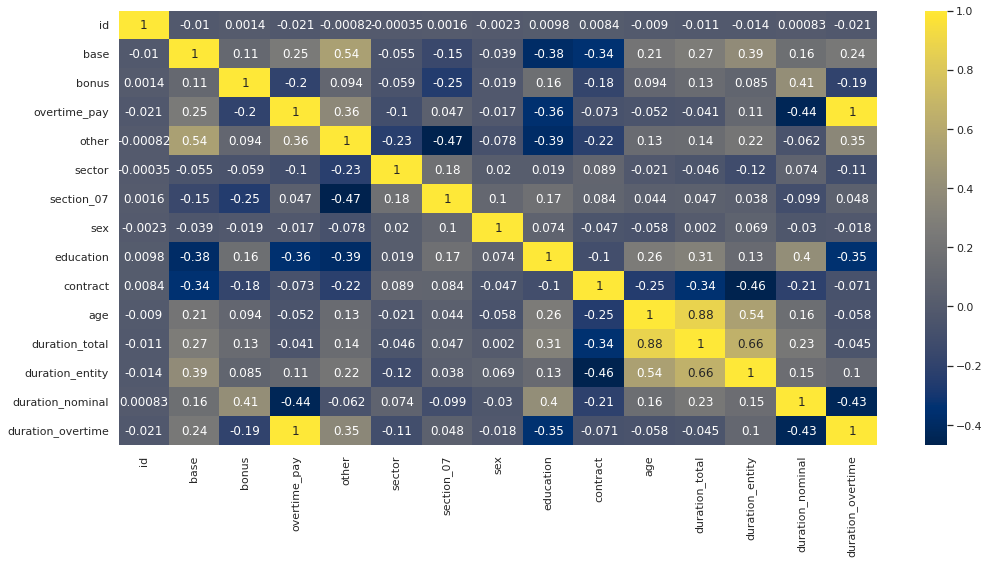

In [ ]:
sns.heatmap(earnings.corr(method = 'spearman'),annot=True,cmap='cividis')##Using the 
##seaborn library  to compute the SPEARMAN correlation coef.

The Spearman's correlation coefficient has a different value to Pearson's. Not being so prone to outliers for example. 
All significant values from the Pearson corr matrix are also present in this matrix. However, there are new values that appear important and are not in the previous coefficients.

**Base** vs **duration_entity** and vs **dur_total** takes both positive coefficients. Greater salaries are related to more time spent working and in the current entity.

**Other** vs **education**, **overtime_pay** vs **duration_nominal** are shown with negative coefficients.



$$EXERCISE \;\;\;3$$

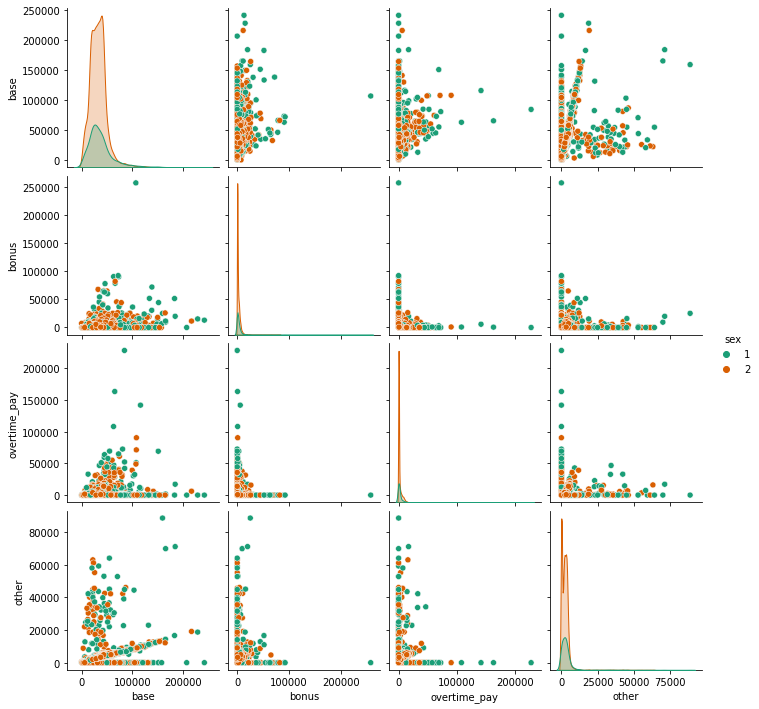

In [ ]:
salary = earnings[['base','bonus','overtime_pay','other','sex']] ##Grouping all the salary related values intpo one dataframe
sns.pairplot(salary,hue='sex',palette = 'Dark2') ##Scatterplotting the variables  2 by 2

This scatterplots are not really representative of the data but can give us an general idea of how this values behave in comparision to one another. I separeted the data into males and females also

The base **salary of the employees** seems to range throughout a big number of values. Not like values like **bonus** or **overtime_pay** who fluctuate a lot less, this last one with a couple of outliers (mainly males with longer overtime working hours). The **other** values are also evenly distributed; when plotted with the **base salary** the data plots along a line close to the base axis.

Outliers can be detected in all the variables with a greater number in **other** and **overtime_pay**

In [6]:
earnings2=earnings.copy()##Create a new dataframe with a copy of the original one
earnings2['sex']=earnings2['sex'].replace((1,2),('Male','Female'))##Replace all the qualitative variables with their respective string values, using replace function
earnings2['education']=earnings2['education'].replace((1,2,3,4,5,6),('doctorate','higher','post secundary','secundary','basic vocational','middle school & before'))
earnings2['sector']=earnings2['sector'].replace((1,2),('public','private'))
earnings2['section_07']=earnings2['section_07'].replace((1,2,3),('Public Administration and Defence; Compulsory Social Security',
                                                                 'Education','Human health and social work activities'))
earnings2['contract']=earnings2['contract'].replace((1,2),('indefinite period','definite period'))

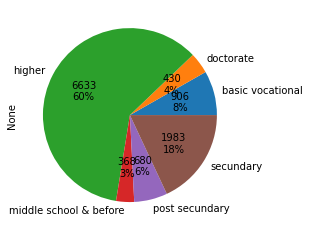

In [72]:
def label_function(v):##Auxiliary function to determine the label of each pice of the pie plot
    return f'{v / 100 * len(earnings2):.0f}\n{v:.0f}%' ##label each of the sides of the pie with this auxiliary function

pie_ed=earnings2.groupby('education').size().plot(kind='pie',autopct=label_function,textprops={'fontsize': 10})##Pie plot for education var.

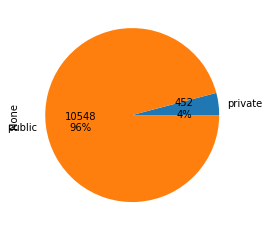

In [73]:
pie_sector=earnings2.groupby('sector').size().plot(kind='pie',autopct=label_function,textprops={'fontsize': 10})##Pie plot for sector var.

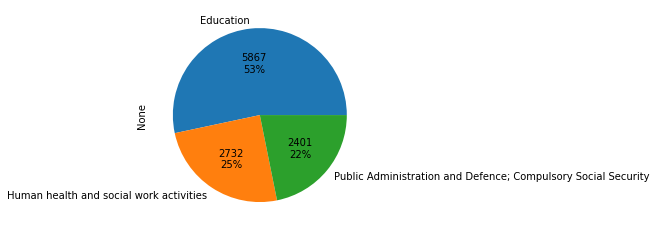

In [ ]:
earnings2.groupby('sector_07').size().plot(kind='pie',autopct=label_function,textprops={'fontsize': 10})##Pie plot for sector_07 var.

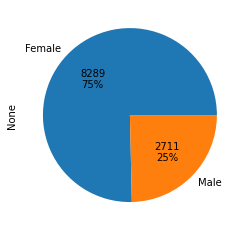

In [ ]:
earnings2.groupby('sex').size().plot(kind='pie',autopct=label_function,textprops={'fontsize': 10})##Pie plot for sex var.


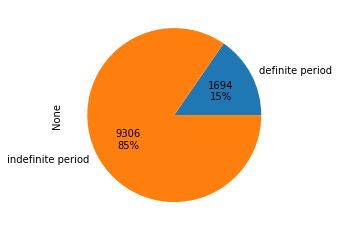

In [74]:
earnings2.groupby('contract').size().plot(kind='pie',autopct=label_function,textprops={'fontsize': 10})

Pieplots give us a simple representation of the percentage of each kind of obversvartion. We plott every categorical value in the dataset. As it can easily be seen there are no NaN all along the dataset pies.
As for the **education** variable we can see a big number of higher educational level (degrees in universities) and a lot of individuals with secundary educational level, all other have similar weight in the dataset.
The public **sector** is well dominant in the dataset over the private.
There is three times as much females than males in **sex**
In **section_07 **two posibilities are equally distributed and one is twice as big (Education).
Most of the contracts are on indefinite terms also

(<seaborn.axisgrid.FacetGrid at 0x7f23398fd910>,
 <seaborn.axisgrid.FacetGrid at 0x7f233715abb0>)

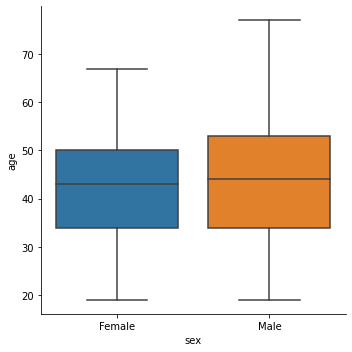

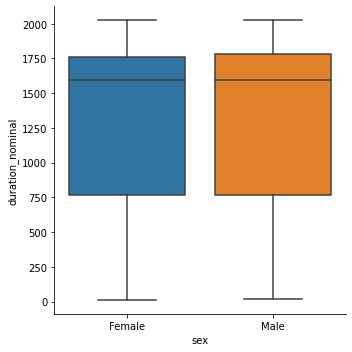

In [ ]:
sns.catplot(data=earnings2, x="sex", y="age", kind="box"),sns.catplot(data=earnings2, x="sex", y="duration_nominal", kind="box")
##Boxplotting the variables age,duration_total and base

We box plot the **age** and **duration_nominal** values in relation to the sex of the employees. 
First of all, there are no aparent outliers because no points are plotted further than the plots whiskers in neither of the two representations. 

In the first plot the males employees range over a bigger set of higher values than females employees, which means that they develop their careers until later, retiring at higher ages.
This is surprising as there are three times as much females in the data as there are males and there should be some women workers that work past their 65 years of age for example. 

As for the second plot, the amount of hours worked is very similarly distributed, there is a tiny variance between sex but not of high significance, also many people tend to work from 1550 to 1700 hours. There is a big concentration of data between values there.

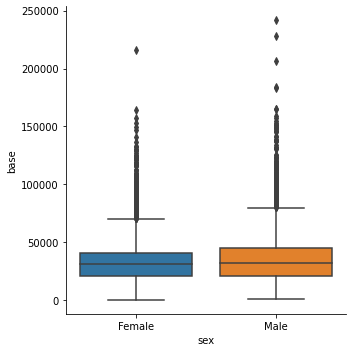

In [ ]:
sns.catplot(data=earnings2, x="sex", y="base", kind="box")

This particular boxplot is full of outliers, mainly due to workers with very high salaries, either males or females, with a higher frequency of extreme outliers in the male section.

Men are slightly better paid as we can see with the 3rd quartil that stands higher than the other one. The interquartil range is also higher for the men, another sign that there is a higher concentration of data towards higher values and so the base salaries are set to be higher.

$$EXERCISE \;\;\;4$$

In [ ]:
mean = np.mean(earnings['age']) ##Compute the actual mean of the column
tfunct=stats.t.ppf(q=0.995,df=len(earnings)-1) ##Compute the t-student in 1-alpha, and 10999 degrees of freedom
Sn2 = np.var(earnings['age'],ddof = 1) ##Compute the unbiaed variance of the column
Sn = math.sqrt(Sn2)
confint=[mean-tfunct*(Sn/math.sqrt(len(earnings)-1)),mean+tfunct*(Sn/math.sqrt(len(earnings)-1))] ##Build the confidence interval with the formula for the mean
print('The confidence interval for the mean, with level of significance = 0.99 is:',confint)



The confidence interval for the mean, with level of significance = 0.99 is: [42.224234114538405, 42.71612952182524]


The Central Limit Theorem allows us to aproximate the mean value $\hat{X}$ of  the data to a Normally distributed set of independent values with mean $\mu$ and variance  
$\sigma$ $/$ $\sqrt{n}$ with values of $n$ > 30 more or less.

We therefore, using this theorem, can use this theorem to build a confidence interval over $\mu$ (the mean of the new normal distributed data)


We use the confidence intervals associated with the gaussian model. 
The confidence interval for the mean with unknown variance is $[\hat{Xn}/ n - t_{(1-\alpha/2,n-1)} * Sn | \sqrt{n-1}     \;\;    ,  \;\;      \hat{Xn}/ n + t_{(1-\alpha/2,n-1)} * Sn | \sqrt{n-1}]$ 

We are going to compute it
being $\alpha = 0.01$, then  $1- \alpha= 0.99$

To do so an auxiliary function is created and the confidence interval is set to $[42.224234114538405   \;\;, \;\;    42.71612952182524]$

In [ ]:
chi2_1=stats.chi2.ppf(0.995,df=len(earnings)-1)##Computation of the chi square at level 0.995
chi2_2=stats.chi2.ppf(0.005,df=len(earnings)-1)##Computation of the chi square at level 0.005
confintvar=[((len(earnings)-1)*Sn2)/chi2_1,((len(earnings)-1)*Sn2)/chi2_2]
print('The confidence interval for the Variancer, with level of significance = 0.99 is:',confintvar)



The confidence interval for the Vr, with level of significance = 0.99 is: [96.84602609043314, 103.81334720276196]


 We compute the confidence interval ralated to the variance, with unknown mean and variance
The confidence interval is $[n*Sn^2/X^2_{(1-\alpha/2,n-1)} \;,\;  n*Sn^2/X^2_{(\alpha/2,n-1)}]$

$1-\alpha=0.99\;\;  , \;\; \alpha = 0.01$





To do so an auxiliary function is created and the confidence interval is set to $[96.84602609043314 \;\;, \;\;103.81334720276196]$

In [82]:
age = (earnings['age'],)
bootstrap_ci = stats.bootstrap(age, statistic=np.median, confidence_level=0.95,method='basic')
print(bootstrap_ci.confidence_interval)


ConfidenceInterval(low=43.0, high=43.0)


Implementing bootstrap our outcome is of no use since the median value for the **age** column in the ernings dataset is still the same.
We had to compute it even though the infpormation given is not useful


$$EXERCISE \;\;\; 5$$

To check the diffreneces in base salary between employees from different sectors we use Kolmogorov-Smirnov two sided test to see if both samples come from similar distributions or not. We will perform this text with $\alpha = 0.01$

In this case the null and alternative hypothesis would be:

$Ho:F=G   \;\;\;\;\;\;vs\;\;\;\;\;\; Ho:F\neq{G}$

bein $F$ and $G$ the two distributions that the subsets of the sector can follow


In [9]:
public = earnings2.query('sector in ["public"]') ##We use the query function in order to subset the sector variable into two datasets 'public' and 'private'
private = earnings2.query('sector in ["private"]')
stats.ks_2samp(public['base'],private['base'])


KstestResult(statistic=0.17758850396501785, pvalue=2.039230481641549e-12)

When performing the test we see a very low p-value $2.030e^-12$ in comparision to the level of significance imposed so we reject the null hypothesis     $Ho:F=G$   

$$-----------------------------------$$

The Central Limit Theorem allows us to infer that    
 $\hat{X} $~$ N(\mu_{x},\sigma_{x} / n) $
 
 $ \hat{Y} $~$ N(\mu_{Y},\sigma_{Y} / n)$

 when $n \rightarrow \infty$, however we can estimate whethere the mean values are similar in this particular samples of **duration_entity** and **duration_total** assuming that they come from a normal distribution. We use the paired t-test for two dependent samples to for the hypothesis test.
For this test the variable  $R = \hat{X} - \hat{Y}$  is created where
 $ \hat{R} $~$ N(\mu_{R},\sigma_{R} )$ and we construct the test with the following hypothesis:

$H_{0}:\mu_{R}=0   \;\;\;\;\;\;vs\;\;\;\;\;\; H_{1}:\mu_{R}\neq0$

In [ ]:
##B
age_30 = earnings.query('age < 30') ##We subset the employees younger than 30 from the dataset
stats.ttest_rel(age_30['duration_total'],age_30['duration_entity'])##Built-in statistical function to compute a paired-ttest result

Ttest_relResult(statistic=20.347987340424076, pvalue=1.1380963469260252e-80)

The p-value is lower than the level of significance which makes us reject the null hypothesis. Duration in total does not have simlar mean to duration entity in individuals younger than 30

$$-----------------------------------$$

The exercise asks to test for a negative correlation between two variables like **duration_total** and **duration_entity**. With the same purpose we use the spearman correlation test, computing the statistic (Spearman coef) = $R$

The null and alternative hypothesis are consecuentlty:

$H_{0}:R=0   \;\;\;\;\;\;vs\;\;\;\;\;\; H_{1}:R<0$

In [ ]:

stats.spearmanr(earnings['duration_overtime'],earnings['duration_total'],alternative='less')##With this built in function from python we compute the spearman corr test

SpearmanrResult(correlation=-0.045413877131359824, pvalue=9.44433711511915e-07)

The p-value being less than $\alpha=0.01$ it infers that the null hypothesis is false, making us reject it and taking that the correlation is indeed negative between the two variables
We therefore say that the more time you have worked the less overtime hours there are for you

$$EXERCISE \;\;\;6$$ 

Once again we use the Central Limit theorem to assume that       $ \hat{X} $~ $N(\mu_{x},\sigma_{x}/n) \;\;\;\;\;\;  \hat{Y} $~ $N(\mu_{Y},\sigma_{Y}/n)$  being $X$ and $Y$ the ages for the public and private respectively . Approximating them to the normal we can use de F-test to test if the variance for the private sector is indeed greater than the private sector. The null and alternative hypothesis are built like this:

$H_{0}:\sigma_{x}=\sigma_{Y}   \;\;\;\;\;\;vs\;\;\;\;\;\; H_{1}:\sigma_{X}<\sigma_{Y}$

In [ ]:
##We program the two sample sized f-test
public ,private ##Public and private datasets, already subsetted
varpublic=np.var(public['age'],ddof=1) ##Compute the variance for the age variable in both datasets
varprivate=np.var(private['age'],ddof=1)
statistic = varpublic/varprivate ##Computing the statistic
ftest=stats.f.ppf(q=0.01,dfn=len(public['age'])-1,dfd=len(private['age'])-1)
if statistic<ftest: ##Comparing the statistic to the critical region
  print('The null hypothesis is rejected')
else:
  print('The null hypothesis is accepted')



The null hypothesis is rejected


Having programmed the F-test the results given are that the variances are different, private being bigger. 

Nevertheless F-test are very sesitive to non-normality and we are going to check the results with another test for variances, that does not claim for normality. Bartlett test

In [15]:
stats.bartlett(public['age'],private['age'])

BartlettResult(statistic=8.403976696832855, pvalue=0.0037440108718962196)

The results are completly different with the Barlett test, we have a $\alpha = 0.01$ level of significance, and the p-value obtained is under that number so we stick with the rejection of the null hypothesis and we take that both variances are not equal. 

In this case because of the sensitivity to non-normaly distributed samples the p-values from the different test are way off.

$$--------------------------$$

We compare the distributions from the base salary of the employees from administration vs healthcare and education. We build two tests, one for each variable.

The Mannwhitneyu tests allows us to test whetherethe distribution of both populations is equal or not (one greater than the other or viceversa). We call $X\;$ to the age sample from the administration subset,  $Y\;\;$ to the age variable from the healthcare subset and finally, $Z\;$ to the age employees from the education subset.
Being F,G and H their respective distribution functions

The null and alternative hypothesis are constructed in the next manner:

$Ho:F_{x}=F_{Y}   \;\;\;\;\;\;vs\;\;\;\;\;\; Ho:F_{x}\neq{F_{Y}}$

$Ho:F_{x}=F_{Z}  \;\;\;\;\;\;vs\;\;\;\;\;\; Ho:F_{x}\neq{F_{Z}}$

In [7]:
education=earnings2.query('section_07 in ["Education"]')##Subsetting the section_07 into three datasets with query function
administration=earnings2.query('section_07 in ["Public Administration and Defence; Compulsory Social Security"]')
healthcare=earnings2.query('section_07 in ["Human health and social work activities"]')

test1=stats.mannwhitneyu(administration['base'],healthcare['base'])##We perform the Mannwhitneyu test on the variables from salaries
test2= stats.mannwhitneyu(administration['base'],education['base'])##The test is done from administration against all other variables
test1,test2

(MannwhitneyuResult(statistic=4224566.5, pvalue=3.7998752935901114e-71),
 MannwhitneyuResult(statistic=9382184.0, pvalue=1.4274273777237877e-124))

The p-value is extremely close to $0$ (smaller tha $\alpha = 0.01$) in both cases which makes us reject the null hypothesis, and accept the alternative, meaning that the distributions are different.

$$-------------------------------$$

As we have seen in the first section, the **duration_entity** in earnings could follow an exponential distribution. We have some strong evidence to belive so having interpreted the qqplot and histograms identyifing the similarities with a exp distribution with $\lambda = 1$.

We compare the duration sample to a randomly generated sample from an exponential distribution with histograms to visulize the posible likeliness

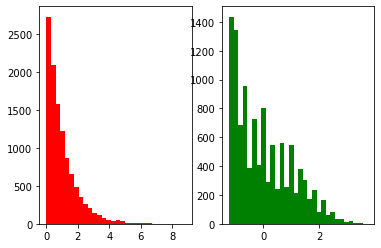

In [113]:
random_exp = np.random.exponential(1,11000)
standar_dur=stats.zscore(earnings['duration_entity'])

ccbins = np.linspace(0, 10, 40)

fig, ax = plt.subplots(1,2)
ax[0].hist(random_exp, bins=30, color = 'r')
ax[1].hist(standar_dur, bins=30, color = 'g')

plt.show()


We can concur now that there is a fair similarity, lets test now for the goodness of fit. The one sided Kolmogorov Smirnov test allows us to check if the **duration_entity** comes indeed from an exponential distribution. With the next null and alternative hypothesis:
$Ho:F=F_{0}   \;\;\;\;\;\;vs\;\;\;\;\;\; Ho:F\neq{F_{0}}$

In [112]:
stats.kstest(cdf=standar_dur,rvs = 'expon')


KstestResult(statistic=0.5872727272727273, pvalue=4.2936780786695296e-07)

The test p-value is way below $0.01$ so we reject once again the null hypothesis and the duration_entity does not follow an exponential distribution

$$EXERCISE \;\;\;7$$

The dataset has alredy been subploted in the prevoius exercise, when performing the two sided t-test
We devided the data into administration, education and healthcare with the function 'query'

In [ ]:
administration,education,healthcare ##The three datasets already subplotted, let's show them:

(           id       base    bonus  overtime_pay    other  sector  section_07  \
 6      170689   42309.75  2390.00           0.0  3457.49       1           1   
 8       27197   54326.46  2840.00           0.0  4335.78       1           1   
 10     149259   49598.76  4700.00           0.0  4133.23       1           1   
 13     155384    7636.99  1742.79           0.0   791.27       1           1   
 16      45811    2306.73     0.00           0.0     0.00       1           1   
 ...       ...        ...      ...           ...      ...     ...         ...   
 10988  194689   30615.54   891.20           0.0  2498.23       1           1   
 10990  139419   30955.12   925.00           0.0  2611.32       1           1   
 10996  120022   28280.00  5470.00           0.0  2385.13       1           1   
 10997   41800  109316.96     0.00           0.0  9042.58       1           1   
 10998  153849   57721.35  6950.00           0.0  4906.32       1           1   
 
        sex  education  co

The clustering will be done in relation to the variables '**base**',**overtime_pay**,**duration_nominal**,**duration_overtime**,**duration_total**. From my point of view these variables are the most significant. When strikes do occur are usually due to some of this factors or all of them combined.

Based on this variables we can see whethere some groups in the administration Nace section are more prone to strikes, based on:low salaries and overtime pay, high number of hours worked and years of experience
 

To initialize the clustering we use the K-Means algorithm over  hierarchical clustering due to the size of the dataset. Being so large all hierarchical methods have to compare data two by two and the algorithm is not so optimal as K-Means, even though this last one is prone to outliers.



To implement the algorithm we first have to standarize all the variables, so that when we plot the values are scaled and the results make sense

In [172]:
##To implement the kmeans algorith we standarize the variables in order to reduce de SRR coeficient betwween variables
standar_adm=administration.copy()
for i in list(range(1,4)) + list(range(10, 14)):
  std = stats.zscore( administration.iloc[:,i])
  standar_adm.iloc[:,i]=std
standar_adm

,id,base,bonus,overtime_pay,other,sector,section_07,sex,education,contract,age,duration_total,duration_entity,duration_nominal,duration_overtime
6,170689,-0.013921,-0.269827,-0.169597,3457.49,public,Public Administration and Defence; Compulsory ...,Female,higher,indefinite period,0.407980,-0.551564,-0.901805,-0.734242,0.0
8,27197,0.495927,-0.200189,-0.169597,4335.78,public,Public Administration and Defence; Compulsory ...,Female,higher,indefinite period,-0.342929,-0.550688,-0.782035,-0.357198,0.0
10,149259,0.295339,0.087648,-0.169597,4133.23,public,Public Administration and Defence; Compulsory ...,Female,higher,indefinite period,-0.342929,-0.029142,0.912901,0.099826,0.0
13,155384,-1.485025,-0.369983,-0.169597,791.27,public,Public Administration and Defence; Compulsory ...,Female,higher,definite period,-1.469292,-1.423729,-1.011898,-2.931764,0.0
16,45811,-1.711179,-0.639681,-0.169597,0.00,public,Public Administration and Defence; Compulsory ...,Female,secundary,definite period,-0.530656,-0.460403,-1.264747,-5.414926,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,194689,-0.510086,-0.501767,-0.169597,2498.23,public,Public Administration and Defence; Compulsory ...,Female,secundary,indefinite period,-0.249065,0.417021,0.549960,0.526381,0.0
10990,139419,-0.495678,-0.496537,-0.169597,2611.32,public,Public Administration and Defence; Compulsory ...,Female,higher,indefinite period,-1.093837,-0.729504,-0.053733,0.556850,0.0
10996,120022,-0.609179,0.206806,-0.169597,2385.13,public,Public Administration and Defence; Compulsory ...,Female,secundary,indefinite period,-0.061338,-0.023883,0.558428,0.434977,0.0
10997,41800,2.829077,-0.639681,-0.169597,9042.58,public,Public Administration and Defence; Compulsory ...,Female,higher,indefinite period,0.501844,0.146168,-1.137717,-0.082984,0.0


In [173]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return (outliers)

out_base=find_outliers_IQR(standar_adm['base'])
out_overpay = find_outliers_IQR(standar_adm['overtime_pay'])
out_durover = find_outliers_IQR(standar_adm['duration_overtime'])
outliers_durnom = find_outliers_IQR(standar_adm['duration_nominal'])
outliers_durtot = find_outliers_IQR(standar_adm['duration_total'])


With this auxiliary function I compute all the possible outliers from the different variables, however the **base** column is the most important but also the most affected by outliers (seems to have a bigger number of them). However the amount of them makes them more likely to create their own cluster. That is why we will not crop the outliers for any variable

The outliers for every variable have been stored in this arrays to have a better understanding of the dataset, however there will be of no use in our clustering technique

$$---------------------------------------$$

We implemet four K-Means clustering algorithms, with variables two by two. These are:

**base salary** and **duration_nominal** (Most significant one as the observations with lower base salaries but higher workhours are most commonly on strike)

**overtime_pay** and **duration_overtime** ( Similarly to the last one but because most of our data is zero in both columns not so important)

**base** and duration_total (employees who have been working more years and have lower income)

**base** and **bonus** (employees with less extra implementations are more eager to throw a strike, probably the least significant of all the groups)

In [174]:
data  = standar_adm[['base', 'duration_nominal']].copy() ##separating columns two by two to implement the k-means algorithm
data_2= standar_adm[['overtime_pay','duration_overtime']].copy()
data_3= standar_adm[['base','duration_total']].copy()
data_4=standar_adm[['bonus','duration_total']].copy()
len(data)

2401

K-Means algorithm has the inconvenient of having to choose the number of clusters beforehand. For that task we have some tools like the silhouette score or the Caliński-Harabasz index. That we will use and plot over all five subsets we created before.

We check the score for each number of posible cluster and whichever has the highest (were the elbow is located) is the optimal option of clusters.

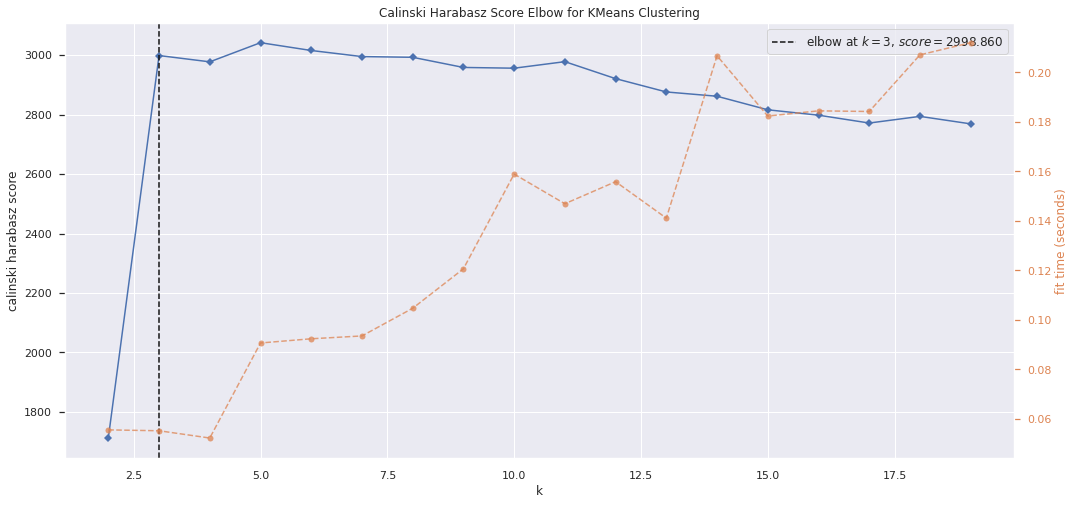

In [175]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20),metric='calinski_harabasz', timings= True)## plot the visualizer fucntion to see all posibilities in the number of clusters
visualizer.fit(data)        
visualizer.show()      ##Showing the data

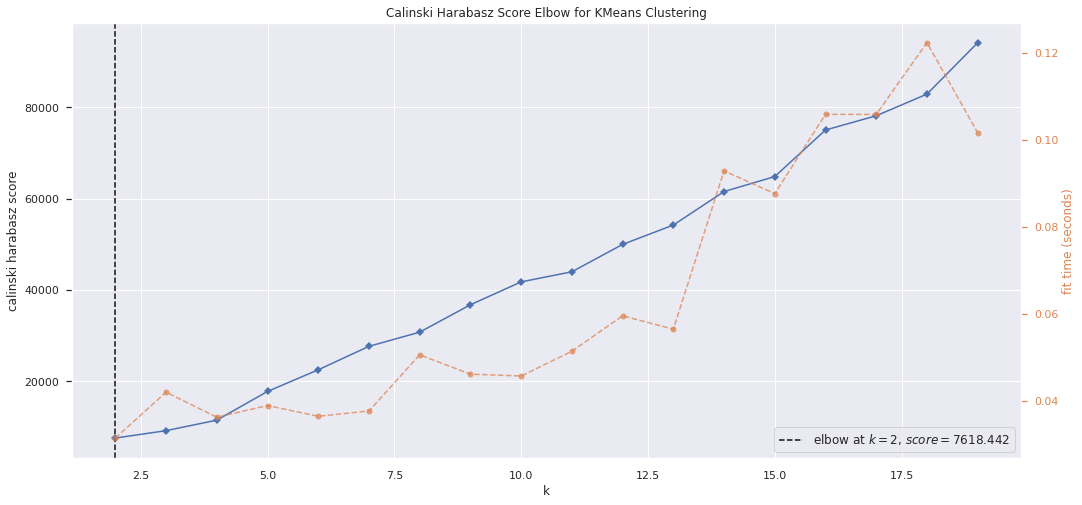

In [176]:
visualizer = KElbowVisualizer(model, k=(2,20),metric='calinski_harabasz', timings= True)
visualizer.fit(data_2)        
visualizer.show()      

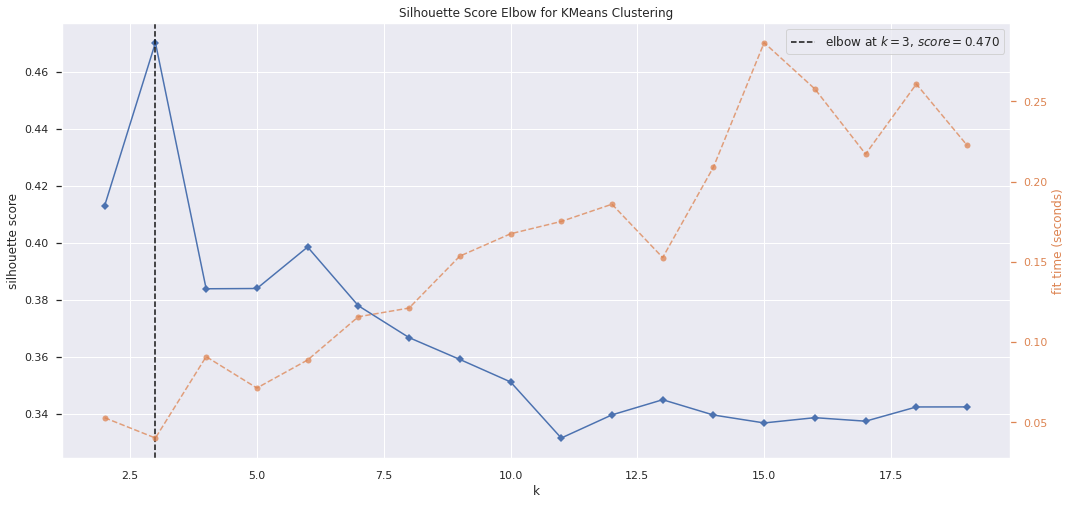

In [177]:
visualizer = KElbowVisualizer(model, k=(2,20),metric='silhouette', timings= True)##We compute this one with silhouette measure to contrast
visualizer.fit(data_3)        
visualizer.show()      

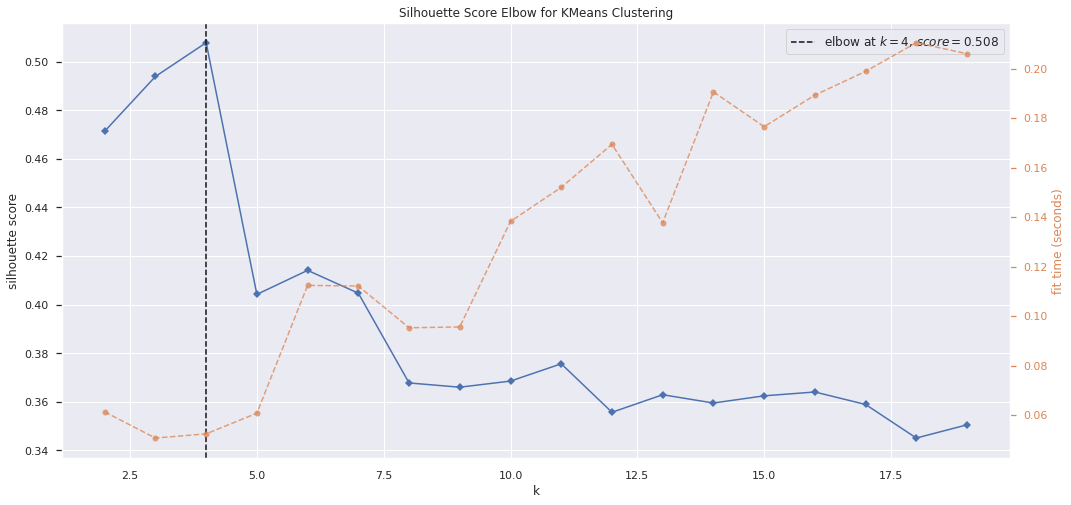

In [178]:
visualizer = KElbowVisualizer(model, k=(2,20),metric='silhouette', timings= True)
visualizer2 = KElbowVisualizer(model, k=(2,20),metric='calinski_harabasz', timings= True)

visualizer.fit(data_4)   
visualizer.show()

We concluded that the K-Means will have two clusters for the first and second sets of data, three for the thirs and four for the fourth.

We scatterplot the data and see that the first

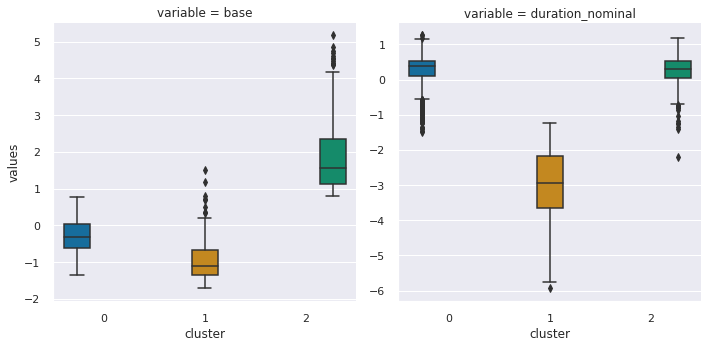

In [179]:
km = KMeans(n_clusters=3).fit(data)##implementation of the algorithm
labels = KMeans(n_clusters=3).fit_predict(data)
data['cluster']=labels

box_data = data.melt(id_vars='cluster', value_vars=data.columns[:-1], var_name='variable', value_name='values')
sns.catplot(kind='box', data=box_data, 
            col='variable', y='values', x='cluster', hue='cluster', palette="colorblind", sharey=False)##boxploting the data

The lowest base salary of the three clustering methods is clearly the $1$, but there is not a big difference with the $0$ cluster, as there really is with the other one in terms of salary.
However when looking at the other variable there is a big gap between clusters. $0$ and $2$ not having flexible workdays and so much for our other cluster. The diference is great and our objective cluster becomes $0$

<function matplotlib.pyplot.show(*args, **kw)>

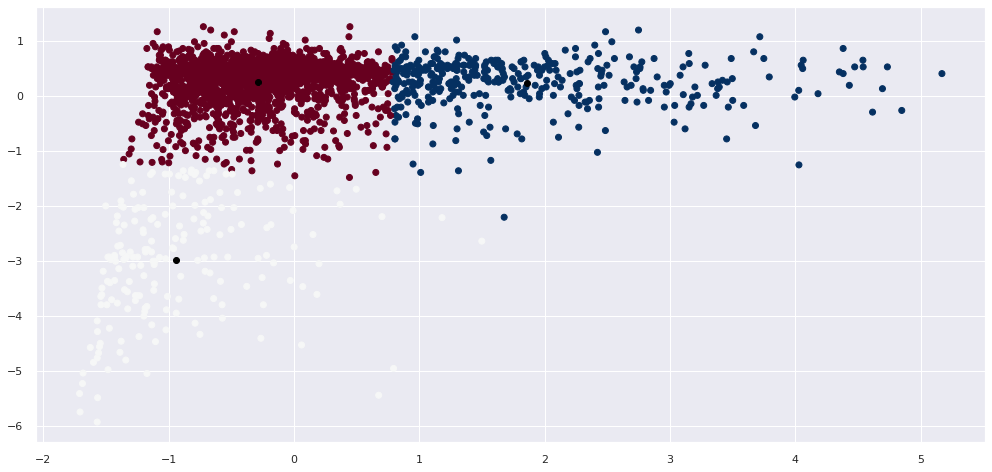

In [180]:
cl_center =km.cluster_centers_
plt.scatter( x =standar_adm['base'] , y =standar_adm['duration_nominal'],c= labels,cmap='RdBu')
plt.scatter(cl_center[:,0],cl_center[:,1],c = 'black')
plt.show


In [181]:
km = KMeans(n_clusters=3).fit(data)
labels = KMeans(n_clusters=3).fit_predict(data) ##labeling all the data in concordance to the kmeans clustering
px.scatter(data, x ='base' , y ='duration_nominal',color= labels)
##plot with plotly.express to see which cluster corresponds to each cloud

In the scatterplot it is obvious that the worst spread cluster is 0 with low base salaries and long hours worked forming a cloud of points in the top left corner, when the ideal spot would be bottom right corner 

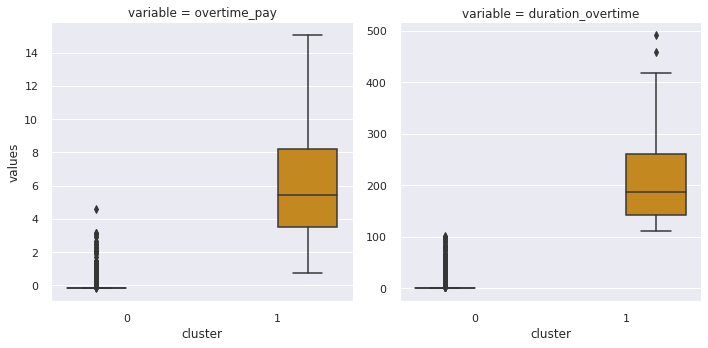

In [182]:
km_2 = KMeans(n_clusters=2).fit(data_2)##implementation of the algorithm
labels_2 = KMeans(n_clusters=2).fit_predict(data_2)
data_2['cluster']=labels_2
box_data_2 = data_2.melt(id_vars='cluster', value_vars=data_2.columns[:-1], var_name='variable', value_name='values')
sns.catplot(kind='box', data=box_data_2, 
            col='variable', y='values', x='cluster', hue='cluster', palette="colorblind", sharey=False)##boxploting the data


This variables are very evenly distributed with employees with high overtime hours having strong overtime payments and viceversa. However if to choose one group with not so favourable conditions, employees usually look for higher salaries so in this case the $0$ cluster is the one I choose.

<function matplotlib.pyplot.show(*args, **kw)>

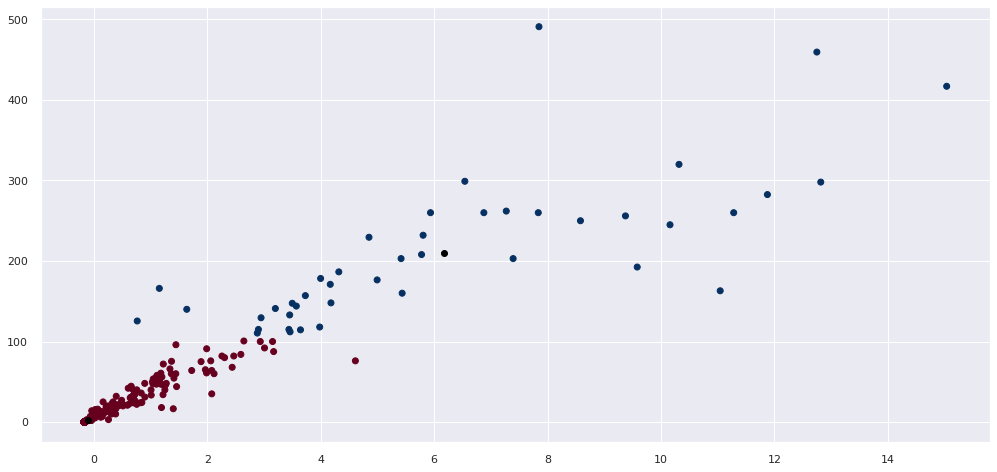

In [183]:
cl_center_2 =km_2.cluster_centers_
plt.scatter( x =standar_adm['overtime_pay'] , y =standar_adm['duration_overtime'],c= labels_2,cmap='RdBu')
plt.scatter(cl_center_2[:,0],cl_center_2[:,1],c = 'black')
plt.show

In [184]:
px.scatter(data_2, x ='overtime_pay' , y ='duration_overtime',color= labels_2)
##plot with plotly.express to see which cluster corresponds to each cloud

We see how the points spread alon the diagonal axis as one variable grows so does the other one

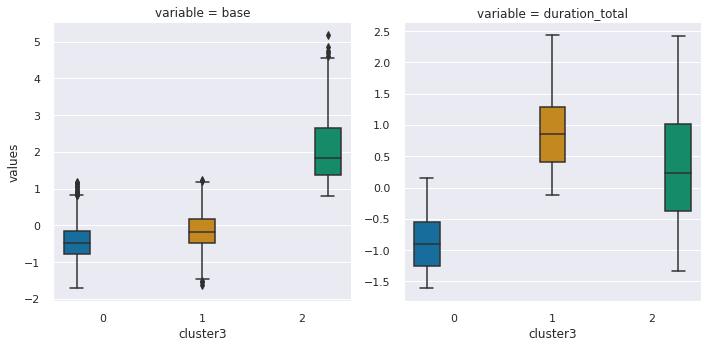

In [185]:
km = KMeans(n_clusters=3).fit(data_3)##implementation of the algorithm
labels_3 = KMeans(n_clusters=3).fit_predict(data_3)
data_3['cluster3']=labels_3

box_data_3 = data_3.melt(id_vars='cluster3', value_vars=data_3.columns[:-1], var_name='variable', value_name='values')
sns.catplot(kind='box', data=box_data_3, 
            col='variable', y='values', x='cluster3', hue='cluster3', palette="colorblind", sharey=False)##boxploting the data

Boxplotting the clusters we see that the $0$ and $1$ have a very similar base salary, the difference comes when we look ath the total duration: years worked. The $1$ cluster has a lot more experience and therefore should have a big difference in salary that is clearly not reflected

<function matplotlib.pyplot.show(*args, **kw)>

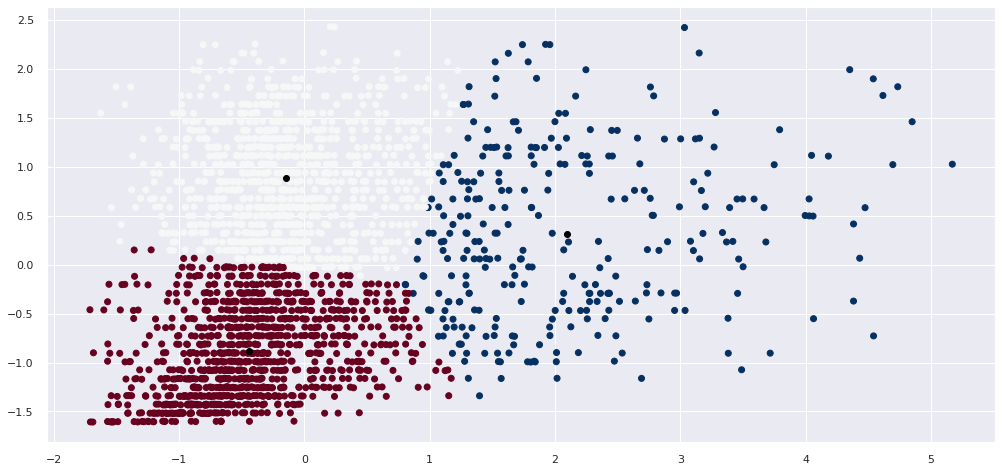

In [186]:
cl_center_3 =km.cluster_centers_ ##plot with matlplotlib to see the centers of each cluster
plt.scatter( x =standar_adm['base'] , y =standar_adm['duration_total'],c= labels_3,cmap='RdBu')##plt scatter both variables
plt.scatter(cl_center_3[:,0],cl_center_3[:,1],c = 'black')
plt.show

In [187]:
px.scatter(data_3, x ='base' , y ='duration_total',color= labels_3) 
##plot with plotly.express to see which cluster corresponds to each cloud

Once again the $1$ sits on the top left corner, the worst spot, meaning the observations from that cluster have the worst conditions in relation to **base salary** and **duration in total** in the workplace

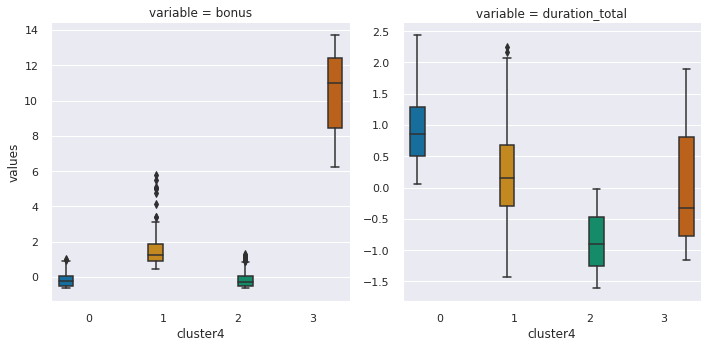

In [189]:
km_4 = KMeans(n_clusters=4).fit(data_4)##implementation of the algorithm
labels_4 = KMeans(n_clusters=4).fit_predict(data_4)
data_4['cluster4']=labels_4

box_data_4 = data_4.melt(id_vars='cluster4', value_vars=data_4.columns[:-1], var_name='variable', value_name='values')
sns.catplot(kind='box', data=box_data_4, 
            col='variable', y='values', x='cluster4', hue='cluster4', palette="colorblind", sharey=False)##boxploting the data


The bonus variable takes very low values, almost 0 for most observations, clusters $2$ , $1$ and $0$ having least. The bigger difference comes when speaking of time worked along the years. Cluster $0$ is the most experienced and yet their bonus is minimum. Even though workers from cluster $1$ seem very experienced, there is not doubt of the unfairness of having such a little bonus having worked for almost your entire life.

All this makes cluster $0$ very probable to strikes

In [190]:
px.scatter(data_4, x ='bonus' , y ='duration_total',color= labels_4)##plot with plotly.express to see which cluster corresponds to each cloud

When plotting a variable related to the salary to one related to time worked, the ideal place for the points to be is the bottom left corner, however cluster $1$ sits mainly in the top left corner which means the conditions for the employees in this cluster related to the bonus and time worked are the worst.

In [170]:
filtered_label1 = standar_adm[labels == 0]
filtered_label2 = standar_adm[labels_2==0]
filtered_label3 = standar_adm[labels_3==1]
filtered_label4 = standar_adm[labels_4==0]
##subseting all the clusters we are more interested in.

We now filter the clusters that we are more interested in and merge them together to see their intersection. Bearing in mind that the mos important and significant data are in **labels** and **labels_3**

In [191]:
merge12=pd.merge(filtered_label1,filtered_label2,on=None)
merge34=pd.merge(filtered_label3,filtered_label4,on=None)
merge_total=pd.merge(merge12,merge34,on = None)
merge_total ##Merging the clusters all together to see the values with the worst conditions

,id,base,bonus,overtime_pay,other,sector,section_07,sex,education,contract,age,duration_total,duration_entity,duration_nominal,duration_overtime,outliers,out_base
0,94763,-1.086064,-0.593256,-0.169597,1365.28,public,Public Administration and Defence; Compulsory ...,Female,secundary,indefinite period,0.501844,0.319724,-0.904225,-0.418134,0.0,NaN,NaN
1,29432,-0.222753,0.062888,-0.169597,0.00,public,Public Administration and Defence; Compulsory ...,Female,higher,indefinite period,0.126389,0.407379,0.556009,-0.448602,0.0,NaN,NaN
2,75434,-0.135001,-0.330179,-0.169597,3353.76,public,Public Administration and Defence; Compulsory ...,Male,secundary,indefinite period,0.314117,0.409132,0.790711,0.282635,0.0,NaN,NaN
3,27691,-0.206709,-0.333429,-0.169597,3358.05,public,Public Administration and Defence; Compulsory ...,Male,secundary,indefinite period,0.126389,0.496787,1.638783,0.282635,0.0,NaN,NaN
4,6234,-0.112091,0.154595,-0.169597,3346.48,public,Public Administration and Defence; Compulsory ...,Female,higher,indefinite period,0.595707,0.588824,0.430189,0.404508,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,138584,-0.206188,-0.423030,-0.169597,3259.59,public,Public Administration and Defence; Compulsory ...,Female,secundary,indefinite period,0.126389,0.413515,1.523852,0.374040,0.0,NaN,NaN
93,161275,-0.683852,0.312687,-0.169597,0.00,public,Public Administration and Defence; Compulsory ...,Female,secundary,indefinite period,0.220253,0.495910,-0.531605,0.587318,0.0,NaN,NaN
94,9548,-0.181179,-0.384342,-0.169597,3229.66,public,Public Administration and Defence; Compulsory ...,Male,higher,indefinite period,0.877298,0.411762,-0.530396,0.343572,0.0,NaN,NaN
95,198495,-0.340165,0.037354,-0.169597,2750.12,public,Public Administration and Defence; Compulsory ...,Female,secundary,indefinite period,0.126389,0.497663,0.559638,-0.570475,0.0,NaN,NaN


Joining all subsets together we find a 97 row dataset of the most probable individuals to strike, since they have the least favourable working conditions. 
We are going to see how other joinings of different subsets behave, however this seems like a very reasonable answer

In [193]:
merge123 =pd.merge(filtered_label3,merge12,on=None)
merge134 = pd.merge(filtered_label1,merge34,on=None)
merge123,merge134

(         id      base     bonus  overtime_pay    other  sector  \
 0     94763 -1.086064 -0.593256     -0.169597  1365.28  public   
 1    135216 -0.400757  0.117051     -0.169597  2770.04  public   
 2     97813 -0.055575 -0.562306     -0.169597  3512.88  public   
 3    186795 -0.290933 -0.469455     -0.169597  2950.46  public   
 4     84682 -0.189580 -0.461718     -0.169597  3244.42  public   
 ..      ...       ...       ...           ...      ...     ...   
 425   61562 -0.323637 -0.570043     -0.169597  2975.85  public   
 426   65681 -0.486094 -0.163807     -0.169597  2840.14  public   
 427    9548 -0.181179 -0.384342     -0.169597  3229.66  public   
 428  198495 -0.340165  0.037354     -0.169597  2750.12  public   
 429  194689 -0.510086 -0.501767     -0.169597  2498.23  public   
 
                                             section_07     sex  \
 0    Public Administration and Defence; Compulsory ...  Female   
 1    Public Administration and Defence; Compulsory ...  Fem

When taking less than the four datasets the amount of data increases a lot, especially when the 4 K-Means cluster is cut off. Bearing in mind than the most significant clusters are 1 and 3, we will compute their joint employees.


In [194]:
merge13 = pd.merge(filtered_label1, filtered_label3, on = None)
merge13

,id,base,bonus,overtime_pay,other,sector,section_07,sex,education,contract,age,duration_total,duration_entity,duration_nominal,duration_overtime,outliers,out_base
0,94763,-1.086064,-0.593256,-0.169597,1365.28,public,Public Administration and Defence; Compulsory ...,Female,secundary,indefinite period,0.501844,0.319724,-0.904225,-0.418134,0.0,NaN,NaN
1,135216,-0.400757,0.117051,-0.169597,2770.04,public,Public Administration and Defence; Compulsory ...,Female,higher,indefinite period,0.783434,0.851789,0.796760,0.282635,0.0,NaN,NaN
2,97813,-0.055575,-0.562306,-0.169597,3512.88,public,Public Administration and Defence; Compulsory ...,Female,post secundary,indefinite period,0.689571,0.846529,1.031462,0.252167,0.0,NaN,NaN
3,186795,-0.290933,-0.469455,-0.169597,2950.46,public,Public Administration and Defence; Compulsory ...,Female,secundary,indefinite period,0.689571,0.757998,-0.053733,0.648254,0.0,NaN,NaN
4,84682,-0.189580,-0.461718,-0.169597,3244.42,public,Public Administration and Defence; Compulsory ...,Male,secundary,indefinite period,1.628207,1.460113,-1.255068,1.135746,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,61562,-0.323637,-0.570043,-0.169597,2975.85,public,Public Administration and Defence; Compulsory ...,Female,secundary,indefinite period,0.971162,0.934184,0.796760,0.526381,0.0,NaN,NaN
448,65681,-0.486094,-0.163807,-0.169597,2840.14,public,Public Administration and Defence; Compulsory ...,Female,higher,indefinite period,0.877298,0.849159,2.125124,-0.753285,0.0,NaN,NaN
449,9548,-0.181179,-0.384342,-0.169597,3229.66,public,Public Administration and Defence; Compulsory ...,Male,higher,indefinite period,0.877298,0.411762,-0.530396,0.343572,0.0,NaN,NaN
450,198495,-0.340165,0.037354,-0.169597,2750.12,public,Public Administration and Defence; Compulsory ...,Female,secundary,indefinite period,0.126389,0.497663,0.559638,-0.570475,0.0,NaN,NaN


In conclusion we can say that there are a little bit less than 100 individuals that are very strike-likey and have to be very careful with them. Addittionally we can add another three haundred and fifty that are prone to follow or start their own, however, their reasons might not be as absolutely strong as the first one haundred.
All this is kept in the datasets: **merge_total**, **merge13, merge123, merge124**

That is our final answer to the clustering of conflictive employees from the administration **NACE_section**